# Anomaly detection with keras

In [2]:
#import the librabry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read the dataset
cred_data=pd.read_csv('./Financial/train_data.csv')
test=pd.read_csv('./Financial/test_data.csv')
test_pred=pd.read_csv('./Financial/test_data_hidden.csv')
print('done')

done


In [10]:
cred_data.shape

(227845, 31)

In [11]:
cred_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [14]:
#class distribution
cred_data['Class'].value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

<Axes: xlabel='Class'>

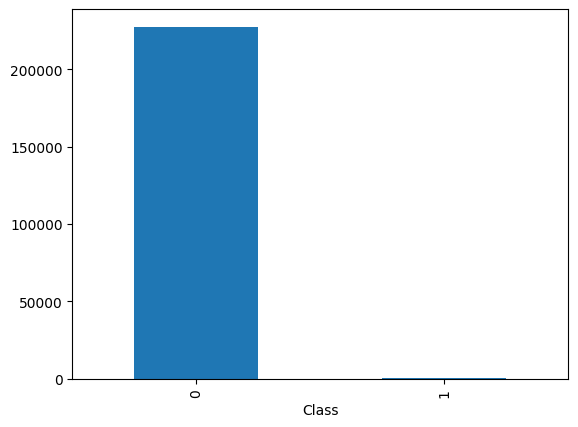

In [15]:
cred_data['Class'].value_counts().plot(kind='bar')

In [17]:
# data is highly imbalanced
frauds=cred_data[cred_data['Class']==1]
normal=cred_data[cred_data['Class']==0]

In [18]:
frauds.shape

(394, 31)

In [19]:
normal.shape

(227451, 31)

In [20]:
# stats
normal['Amount'].describe()

count    227451.000000
mean         88.455144
std         248.066088
min           0.000000
25%           5.640000
50%          22.000000
75%          77.000000
max       19656.530000
Name: Amount, dtype: float64

In [21]:
# stats
frauds['Amount'].describe()

count     394.000000
mean      127.306523
std       264.533907
min         0.000000
25%         1.000000
50%        11.395000
75%       106.385000
max      2125.870000
Name: Amount, dtype: float64

# Autoencoder- Reconstruct the input
Fraud---

normal--- Train the AE- Reconstruct input

test---Fraud + Normal, Check the Reconstruction error

normal data ---0.1 normal

fraud data ---10

In [22]:
#scale the data
from sklearn.preprocessing import StandardScaler
cred_data=cred_data.drop(['Time'], axis=1)
sc=StandardScaler()
cred_data['Amount']=sc.fit_transform(cred_data['Amount'].values.reshape(-1,1))

In [23]:
cred_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,0.499167,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,-0.156600,0
1,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,-0.658751,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,-0.288523,0
2,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,-1.109522,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,-0.352771,0
3,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,0.154307,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,-0.313351,0
4,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,0.428729,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,-0.195737,0


In [26]:
# prepare training & test data
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(cred_data,test_size=0.2,random_state=42)
X_train=X_train[X_train['Class']==0]

In [27]:
X_train.shape

(181952, 30)

In [29]:
y_test=X_test['Class']
X_test=X_test.drop(['Class'],axis=1)

In [31]:
X_test.shape

(45569, 29)

In [32]:
# create the architecture of autoencoder
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input,Dense

In [34]:
input_dim=X_train.shape[1]

input_layer=Input(shape=(input_dim,))

encoder=Dense(14,activation='tanh')(input_layer)
encoder=Dense(7, activation='relu')(encoder)

decoder=Dense(14,activation='tanh')(encoder)
decoder=Dense(input_dim, activation='relu')(decoder)

autoencoder=Model(inputs=input_layer,outputs=decoder)
